In [54]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import *
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor as rgt
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

In [2]:
import seaborn
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
boston = load_boston()

In [4]:
X = boston.data
y = boston.target

In [5]:
X.shape

(506, 13)

In [6]:
X_train = X[0:380]
y_train = y[0:380]
X_test = X[-126:]
y_test = y[-126:]

In [14]:
base_algorithms_list = []
coefficients_list = []

In [18]:
def gbm_predict(X):
    if len(coefficients_list) != 0:
        return [sum([coeff * algo.predict([x])[0] for algo, coeff in 
                     zip(base_algorithms_list, coefficients_list)]) for x in X]
    else:
        return [0] * X.shape[0]

In [21]:
for i in range(50):
    tree = rgt(max_depth=5, random_state=42)
    tree.fit(X_train, y_train-gbm_predict(X_train))
    base_algorithms_list.append(tree)
    coefficients_list.append(0.9)

In [24]:
ans2 = mse(gbm_predict(X_test), y_test) ** 0.5
ans2

5.4554720745275347

In [25]:
with open('ans2.txt', 'w') as fout:
    print(ans2, file=fout)

In [26]:
base_algorithms_list = []
coefficients_list = []

In [27]:
for i in range(50):
    tree = rgt(max_depth=5, random_state=42)
    tree.fit(X_train, y_train-gbm_predict(X_train))
    base_algorithms_list.append(tree)
    coefficients_list.append(0.9/(1+i))

In [28]:
ans3 = mse(gbm_predict(X_test), y_test) ** 0.5
ans3

5.2407425841471982

In [29]:
with open('ans3.txt', 'w') as fout:
    print(ans3, file=fout)

In [36]:
error_train = []
error_test = []
for depth in np.arange(1, 100, 2):
    booster = xgb.XGBRegressor(learning_rate=0.2, n_estimators=50, max_depth=depth)
    booster.fit(X_train, y_train)
    error_train.append(mse(y_train, booster.predict(X_train)))
    error_test.append(mse(y_test, booster.predict(X_test)))

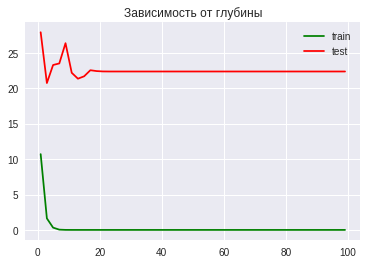

In [38]:
plot(np.arange(1, 100, 2), error_train, 'g', label='train')
plot(np.arange(1, 100, 2), error_test, 'r', label='test')
legend()
title('Зависимость от глубины')
show()

In [39]:
%%time
error_train = []
error_test = []
for n in np.arange(10, 1000, 10):
    booster = xgb.XGBRegressor(learning_rate=0.2, n_estimators=n)
    booster.fit(X_train, y_train)
    error_train.append(mse(y_train, booster.predict(X_train)))
    error_test.append(mse(y_test, booster.predict(X_test)))

CPU times: user 56.4 s, sys: 572 ms, total: 57 s
Wall time: 15.4 s


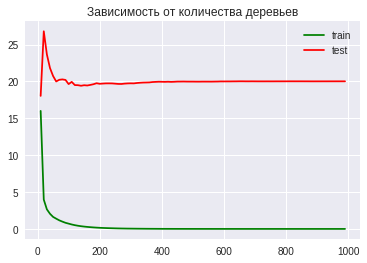

In [40]:
plot(np.arange(10, 1000, 10), error_train, 'g', label='train')
plot(np.arange(10, 1000, 10), error_test, 'r', label='test')
legend()
title('Зависимость от количества деревьев')
show()

In [48]:
booster = xgb.XGBRegressor(learning_rate=0.01, n_estimators=10000)
booster.fit(X_train, y_train)
mse(y_test, booster.predict(X_test))

21.201961589191264

In [53]:
with open('ans4.txt', 'w') as fout:
    print('2 3', file=fout)

In [55]:
estimator = LinearRegression()
estimator.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
ans5 = mse(y_test, estimator.predict(X_test)) ** 0.5

In [61]:
with open('ans5.txt', 'w') as fout:
    print(ans5, file=fout)